# Data Prep

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

## Read the data

In [2]:
df = pd.read_csv('data/credit_risk_dataset.csv')

## Data Understanding

In [3]:
df.shape

(32581, 12)

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


- The dataset contains some missing values and potential outliers.

- Most numerical columns show signs of skewness, with means slightly above the median.

- This suggests the presence of high-end outliers across several features.

- In particular, person_age and person_emp_length have concerning outliers. The unusually high ages may indicate incorrect data entry or inconsistent data capture.

In [7]:
df.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [8]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: person_home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Column: loan_intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column: loan_grade
['D' 'B' 'C' 'A' 'E' 'F' 'G']

Column: cb_person_default_on_file
['Y' 'N']


## Data cleaning

### Outliers

In [9]:
df[df['person_emp_length'] > 30]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
30914,48,70000,MORTGAGE,31.0,HOMEIMPROVEMENT,D,9000,14.54,0,0.13,N,17
31866,47,178000,OWN,31.0,VENTURE,B,9000,10.99,0,0.05,N,17
31867,46,180000,MORTGAGE,31.0,VENTURE,B,18000,9.91,0,0.10,N,11
32263,46,180000,MORTGAGE,31.0,MEDICAL,B,18000,9.91,0,0.10,N,12
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32428,58,49000,MORTGAGE,34.0,MEDICAL,D,7500,13.55,1,0.15,Y,24
32515,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,N,23


- A logical inconsistency was found: two entries show individuals aged 21 and 22 with person_emp_length recorded as 123 years, which is clearly invalid.
- While dropping these two rows would have minimal impact, the overall dataset is small. Therefore, the outlier values will be replaced with the median of the person_emp_length column to retain as much data as possible without compromising quality.

In [10]:
df['person_emp_length'] = df['person_emp_length'].replace({123.0: 4.0})

In [11]:
df[df['person_age'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [12]:
df = df[df['person_age'] < 100]

In [13]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32576.000000,3.257600e+04,31681.000000,32576.000000,29461.000000,32576.000000,32576.000000,32576.000000
mean,27.718044,6.588214e+04,4.782014,9589.117755,11.011547,0.218197,0.170212,5.803966
std,6.204990,5.253499e+04,4.034825,6321.886846,3.240623,0.413029,0.106778,4.053791
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Some entries showed unrealistic ages (up to 144), likely due to data entry errors or misencoded missing values. To reduce noise without excluding valid elderly borrowers, extreme values were capped at a reasonable upper limit.

### Duplicates

In [14]:
df.duplicated().sum()

165

In [15]:
df = df.drop_duplicates()

### Missing Values

In [16]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3094
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [17]:
df.fillna({'person_emp_length' :4}, inplace=True)

In [18]:
target_column = "loan_int_rate"

# Create a dataframe with only rows where the target column is NOT missing
df_train = df[df[target_column].notnull()]

X = df_train.drop(columns=[target_column])
y = df_train[target_column] 

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype(int)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)


R-squared: 0.9019778766147899
Root Mean Squared Error (RMSE): 1.0091394645763914


In [20]:
df_missing = df[df[target_column].isnull()]
X_missing = df_missing.drop(columns=[target_column])

# Convert categorical variables to match training data
X_missing = pd.get_dummies(X_missing, drop_first=True).reindex(columns=X.columns, fill_value=0)

# Predict missing values
predicted_values = model.predict(X_missing)

df_cleaned = df.copy()

# Fill missing values
df_cleaned.loc[df[target_column].isnull(), target_column] = predicted_values

- The loan_int_rate column has a significant number of missing entries (3094 out of 32,411). Dropping these rows would result in a substantial data loss, and filling them with guessed values could skew the distribution. To address this, a linear regression model was used to predict and fill the missing values.

# Visualize

In [21]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

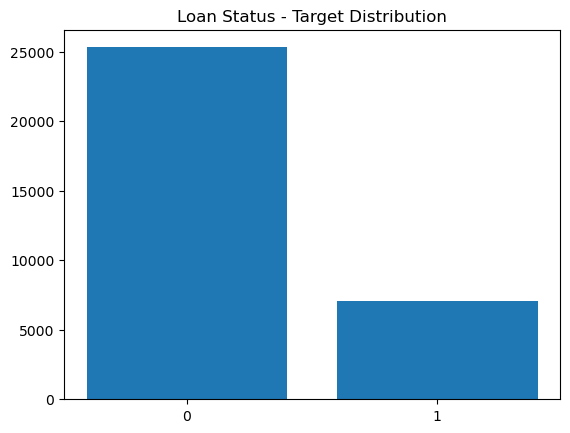

In [22]:
loan_stats = df['loan_status'].value_counts()
plt.bar(x=loan_stats.index, height=loan_stats.values, tick_label = [0,1])
plt.title('Loan Status - Target Distribution')
plt.show()

- The distribution is highly imbalanced

# Modeling

[LightGBM] [Info] Number of positive: 5671, number of negative: 20257
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2523
[LightGBM] [Info] Number of data points in the train set: 25928, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Accuracy: 0.8940305414160111

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5065
           1       0.72      0.84      0.78      1418

    accuracy                           0.89      6483
   macro avg       0.84      0.87      0.85      6483
weighted avg       0.90      0.89      0.90      6483

AUC-ROC Score: 0.9451859257021209


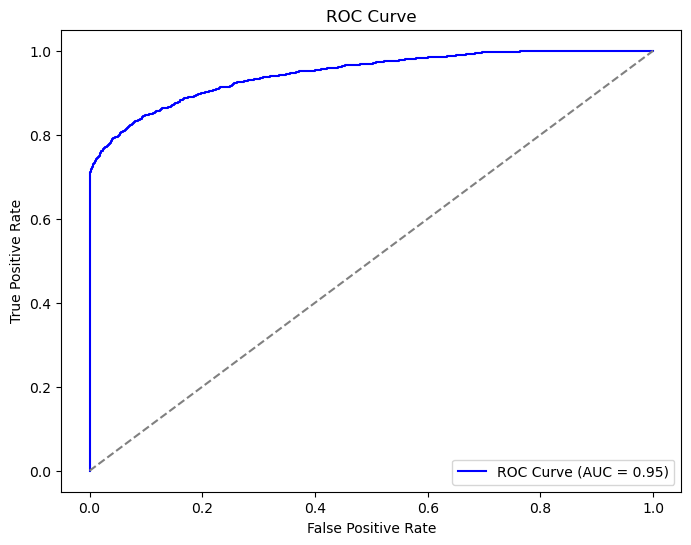

In [72]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

target_column = "loan_status"

# Assuming df_train is your dataframe
X = df_cleaned.drop(columns=[target_column])  # Features
y = df_cleaned[target_column]  # Target variable

# Handle categorical features
X = pd.get_dummies(X, drop_first=True)

# Scale the features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Train a LightGBM model
lgb_model = lgb.LGBMClassifier(class_weight='balanced',random_state=42)
lgb_model.fit(X_train, y_train)



# Predict on the test set
y_prob = lgb_model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Set custom threshold
threshold = 0.4
y_pred = (y_prob >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


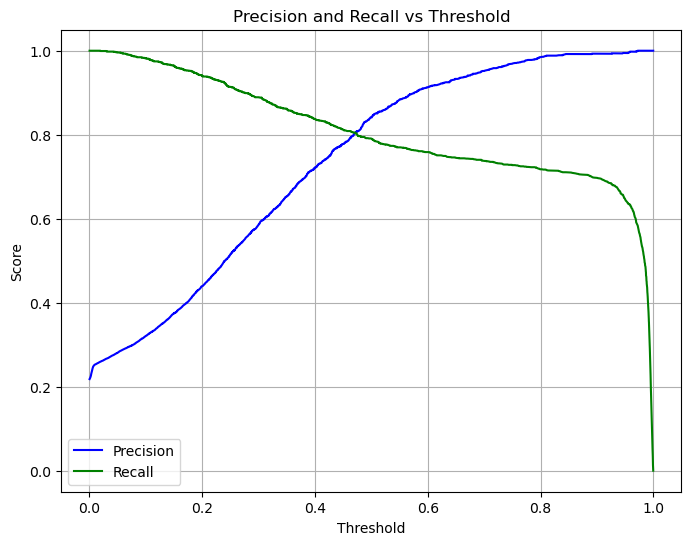

In [70]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


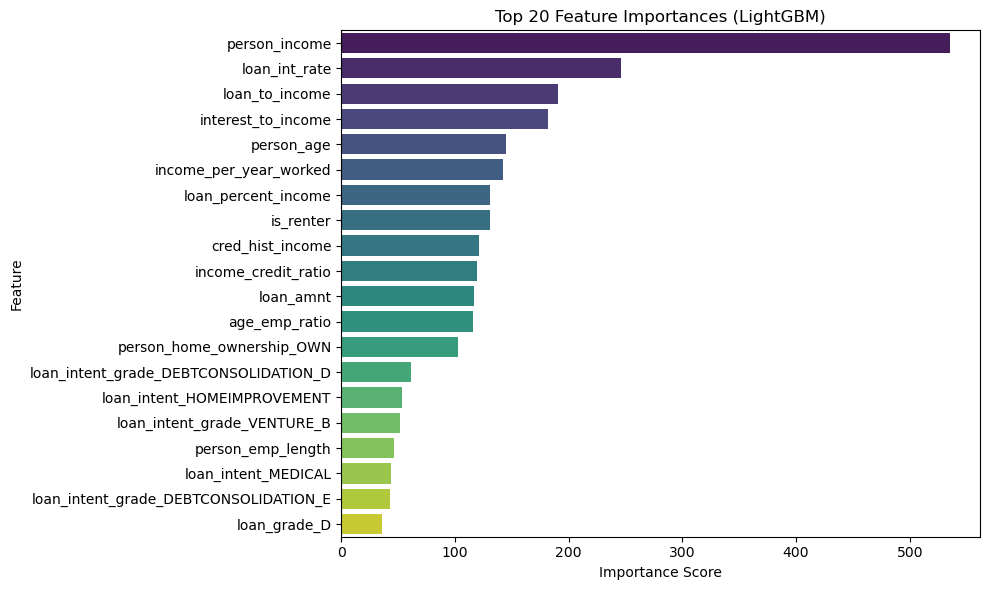

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names (after get_dummies)
feature_names = X.columns

# Get feature importances from the trained model
importances = lgb_model.feature_importances_

# Create a DataFrame for easier handling
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances (LightGBM)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

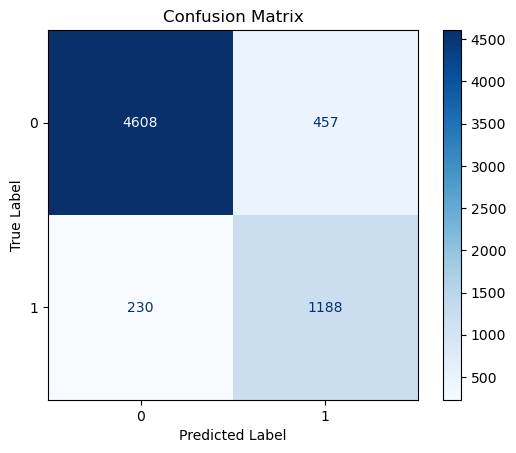

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your best-performing model
cm = confusion_matrix(y_test, y_pred)  # Use y_pred if you didn't apply threshold
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Conclusion: 

By implementing this credit risk prediction model, I was able to provide a solution that minimizes financial risks associated with loan defaults. The model focuses on identifying defaulters, allowing for more effective risk management and lending decisions. 